<a href="https://colab.research.google.com/github/achararjun/Arjun_Achar_Project1_regression/blob/main/Intro_to__ML_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1- prediction of House prices using supervised learning
Note This project is based on the principles of linear regression taught in class
💡I would recommend you to do this project with utmost focus and upload the same in your github account as a repository , this will help you build your project portfolio



This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

# House Sales in King County, USA

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


Importing the data set 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
dff=pd.read_csv(file_name)

In [ ]:
dff.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
dff.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#Question 1
Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. 

In [ ]:
#start here 
dff.drop(['id','Unnamed: 0'],inplace=True,axis=1)
dff.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## **Question 2 **


Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> 

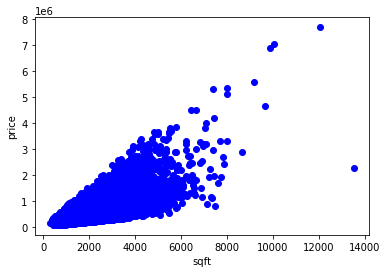

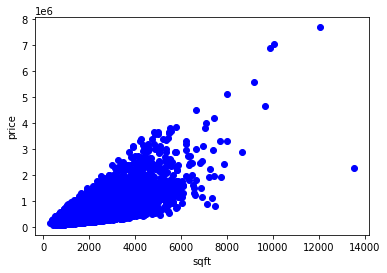

Coefficients:  [[281.83375216]]
Intercept:  [-45850.76735561]


Text(0, 0.5, 'price')

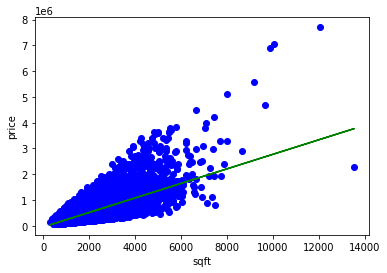

In [ ]:
#Start your code here 
##plotted for your reference 
plt.scatter(dff.sqft_living, dff.price,  color='blue')
plt.xlabel("sqft")
plt.ylabel("price")
plt.show()

cdf=dff[['sqft_living','price']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cdf,cdf,test_size=.2,random_state=4);

plt.scatter(X_train.sqft_living,X_train.price,  color='blue')
plt.xlabel("sqft")
plt.ylabel("price")
plt.show()

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train[['sqft_living']])
train_y = np.asanyarray(X_train[['price']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(X_train.sqft_living, X_train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-g')
plt.xlabel("sqft")
plt.ylabel("price")







Question 3 


Evaluate the model for accuracy using the methods taught in class 


In [ ]:
#start here 
#evaluation
test_x = np.asanyarray(X_test[['sqft_living']])
test_y = np.asanyarray(X_test[['price']])
test_y_ = regr.predict(test_x)
mae= np.mean(np.absolute(test_y_ - test_y))
mae_=mae/21612
mse=np.mean((test_y_ - test_y) ** 2)
mse_=mse/21612
print("Mean absolute error: " , mae_)
print("Residual sum of squares (MSE): " ,mse_ )

Mean absolute error:  8.019897289266288
Residual sum of squares (MSE):  3093898.1060361466


Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'view'</code> 

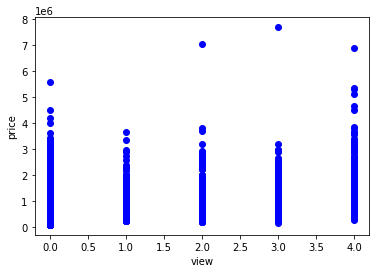

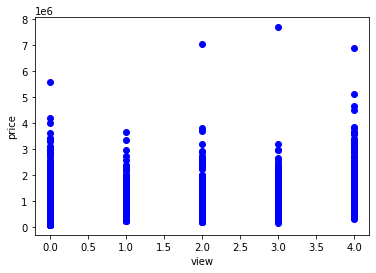

Coefficients:  [[190590.73496097]]
Intercept:  [495162.92731914]
Mean absolute error:  10.00057905658785
Residual sum of squares (MSE):  5011067.8970884755


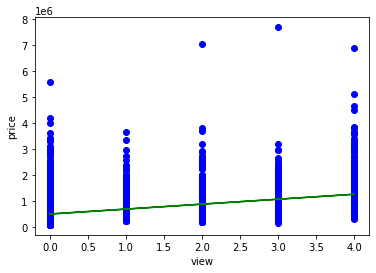

In [ ]:

plt.scatter(dff.view, dff.price,  color='blue')
plt.xlabel("view")
plt.ylabel("price")
plt.show()

cdf=dff[['view','price']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cdf,cdf,test_size=.2,random_state=4);

plt.scatter(X_train.view,X_train.price,  color='blue')
plt.xlabel("view")
plt.ylabel("price")
plt.show()

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train[['view']])
train_y = np.asanyarray(X_train[['price']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(X_train.view, X_train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-g')
plt.xlabel("view")
plt.ylabel("price")

#evaluation
test_x = np.asanyarray(X_test[['view']])
test_y = np.asanyarray(X_test[['price']])
test_y_ = regr.predict(test_x)
mae= np.mean(np.absolute(test_y_ - test_y))
mae_=mae/21612
mse=np.mean((test_y_ - test_y) ** 2)
mse_=mse/21612
print("Mean absolute error: " , mae_)
print("Residual sum of squares (MSE): " ,mse_ )


Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'grade'</code> 

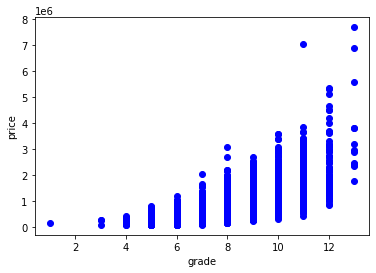

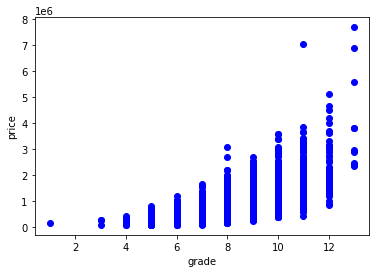

Coefficients:  [[209349.23305535]]
Intercept:  [-1062636.76835037]
Mean absolute error:  8.068435851555488
Residual sum of squares (MSE):  3327008.8610192053


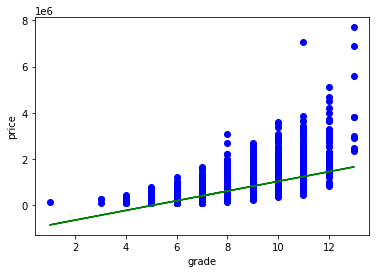

In [ ]:
plt.scatter(dff.grade, dff.price,  color='blue')
plt.xlabel("grade")
plt.ylabel("price")
plt.show()

cdf=dff[['grade','price']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cdf,cdf,test_size=.2,random_state=4);

plt.scatter(X_train.grade,X_train.price,  color='blue')
plt.xlabel("grade")
plt.ylabel("price")
plt.show()

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train[['grade']])
train_y = np.asanyarray(X_train[['price']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(X_train.grade, X_train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-g')
plt.xlabel("grade")
plt.ylabel("price")

#evaluation
test_x = np.asanyarray(X_test[['grade']])
test_y = np.asanyarray(X_test[['price']])
test_y_ = regr.predict(test_x)
mae= np.mean(np.absolute(test_y_ - test_y))
mae_=mae/21612
mse=np.mean((test_y_ - test_y) ** 2)
mse_=mse/21612
print("Mean absolute error: " , mae_)
print("Residual sum of squares (MSE): " ,mse_ )


Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'yr_built'</code> 

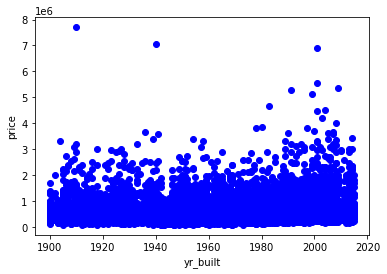

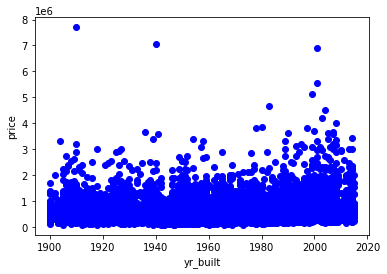

Coefficients:  [[697.1750466]]
Intercept:  [-834300.80646315]
Mean absolute error:  10.71754057070159
Residual sum of squares (MSE):  5971494.775409087


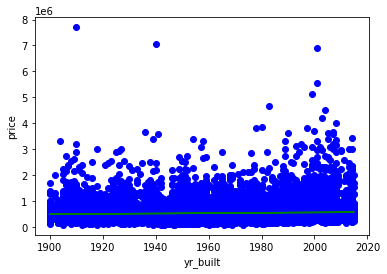

In [ ]:
plt.scatter(dff.yr_built, dff.price,  color='blue')
plt.xlabel("yr_built")
plt.ylabel("price")
plt.show()

cdf=dff[['yr_built','price']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cdf,cdf,test_size=.2,random_state=4);

plt.scatter(X_train.yr_built,X_train.price,  color='blue')
plt.xlabel("yr_built")
plt.ylabel("price")
plt.show()

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train[['yr_built']])
train_y = np.asanyarray(X_train[['price']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(X_train.yr_built, X_train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-g')
plt.xlabel("yr_built")
plt.ylabel("price")

#evaluation
test_x = np.asanyarray(X_test[['yr_built']])
test_y = np.asanyarray(X_test[['price']])
test_y_ = regr.predict(test_x)
mae= np.mean(np.absolute(test_y_ - test_y))
mae_=mae/21612
mse=np.mean((test_y_ - test_y) ** 2)
mse_=mse/21612
print("Mean absolute error: " , mae_)
print("Residual sum of squares (MSE): " ,mse_)

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'floors'</code> 

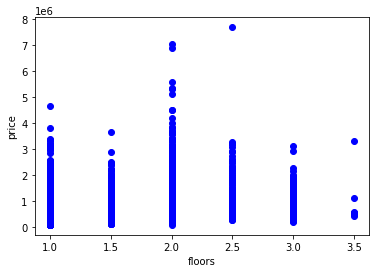

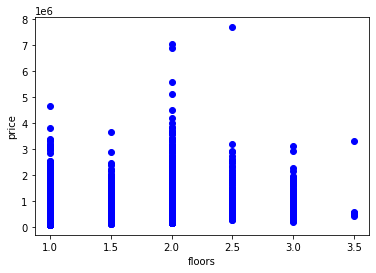

Coefficients:  [[176903.28625488]]
Intercept:  [275922.04073716]
Mean absolute error:  10.319252983696849
Residual sum of squares (MSE):  5614353.7126011355


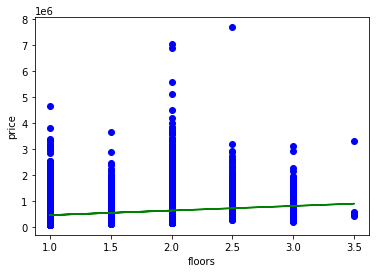

In [ ]:
plt.scatter(dff.floors, dff.price,  color='blue')
plt.xlabel("floors")
plt.ylabel("price")
plt.show()

cdf=dff[['floors','price']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cdf,cdf,test_size=.2,random_state=4);

plt.scatter(X_train.floors,X_train.price,  color='blue')
plt.xlabel("floors")
plt.ylabel("price")
plt.show()

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train[['floors']])
train_y = np.asanyarray(X_train[['price']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(X_train.floors, X_train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-g')
plt.xlabel("floors")
plt.ylabel("price")

#evaluation
test_x = np.asanyarray(X_test[['floors']])
test_y = np.asanyarray(X_test[['price']])
test_y_ = regr.predict(test_x)
mae= np.mean(np.absolute(test_y_ - test_y))
mae_=mae/21612
mse=np.mean((test_y_ - test_y) ** 2)
mse_=mse/21612
print("Mean absolute error: " , mae_)
print("Residual sum of squares (MSE): " ,mse_)

For all these models, we can see that the mean absolute error and residual sum of squares error are extremely large and we can conclude that a linear regression model is not accurate for these data sets.